In [1]:
import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2 as cv
import synth_text_dataset

%matplotlib inline

In [11]:
def apply_filters_to_image(img):
    img = img.mean(axis=2)
    
    # Gaussian blur
    filter = cv.getGaussianKernel(5, 0.5)
    img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Sharpening filter
    # filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # img = cv.Canny(np.array(img, np.uint8), 200, 250)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # img = cv.filter2D(np.array(img, float), -1, filter)
    
    # Median filter
    # img = cv.medianBlur(np.array(img, np.uint8), 5)
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # img = cv.filter2D(np.array(img, float), -1, filter)
    return img

def apply_filters_to_char(char_img):
    # Gaussian blur
    # filter = cv.getGaussianKernel(5, 0.5)
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Sharpening filter
    filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Edge detection
    # filter = np.full((7, 7), -1)
    # filter[len(filter) // 2, len(filter) // 2] = -filter.sum() - 1
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    
    # Median filter
    # char_img = torch.from_numpy(cv.medianBlur(np.array(char_img, np.uint8), 5)).int()
    
    # Blur filter
    # filter = np.ones((5, 5), np.float32)
    # filter /= filter.sum()
    # char_img = cv.filter2D(np.array(char_img, float), -1, filter)
    return char_img

C:\Users\Hanich\AppData\Local\Temp\ipykernel_17964\853571294.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[:, 2])


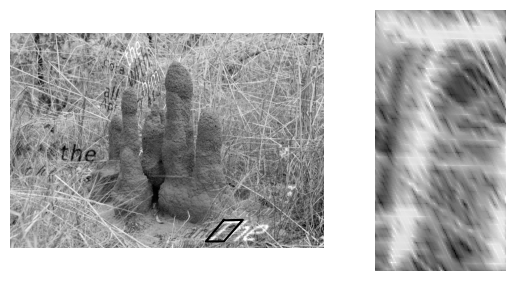

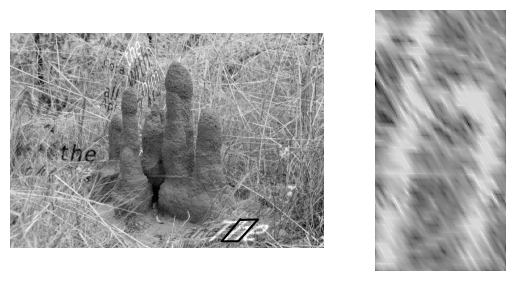

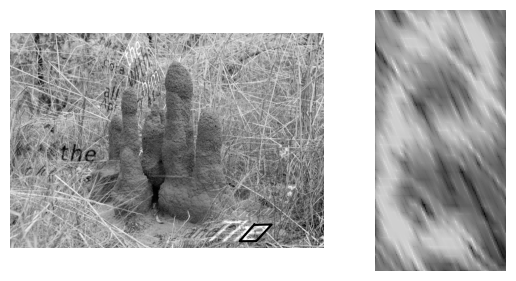

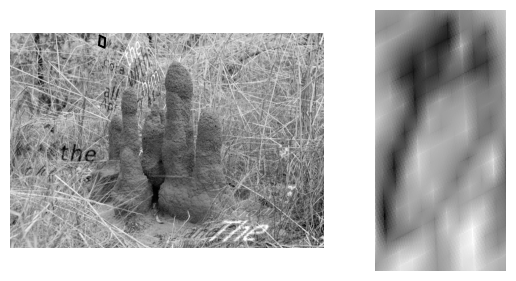

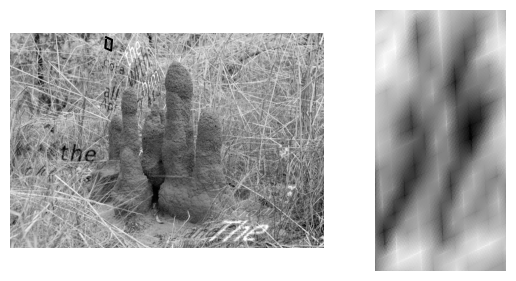

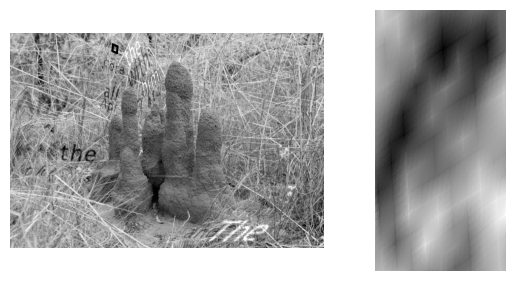

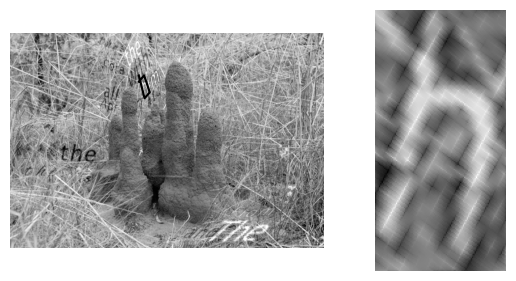

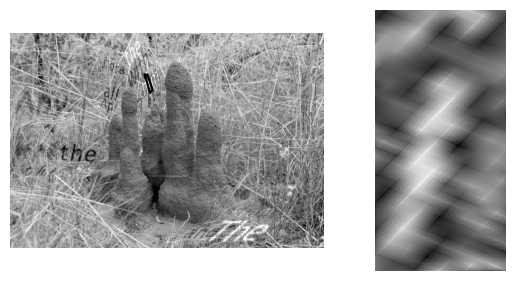

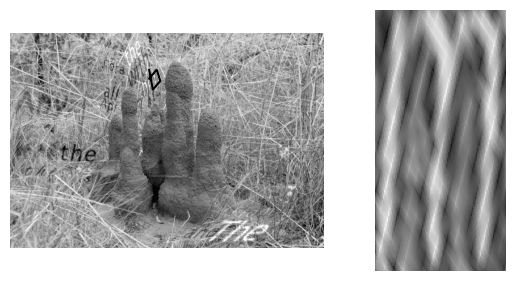

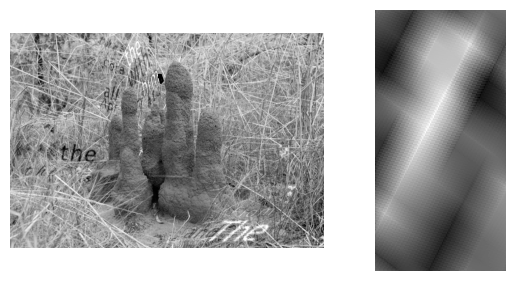

In [12]:
filename = 'Project/SynthText_train.h5'
dataset = synth_text_dataset.SynthTextCharactersDataset(filename, full_image_transform=apply_filters_to_image, on_get_item_transform=apply_filters_to_char)

data_samples = 10

for i in range(data_samples):
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    
    plt.figure()
    (img_name, charBB), font = dataset.get_item_raw(i)
    char_img, font = dataset[i]
    plt.title(font)
    
    img = dataset.get_image_data(img_name)
    
    plt.subplot(grid[:, 2])
    plt.axis('off')
    plt.imshow(char_img, 'gray')
    
    
    plt.subplot(grid[:, :2])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.plot(np.append(charBB[0], charBB[0, 0]), np.append(charBB[1], charBB[1, 1]), c='black')
    
    # plt.subplot(grid[:, 3])
    # plt.axis('off')
    # plt.imshow(char_img, cmap='gray')
    
    plt.show()
    